# Logistic Regression

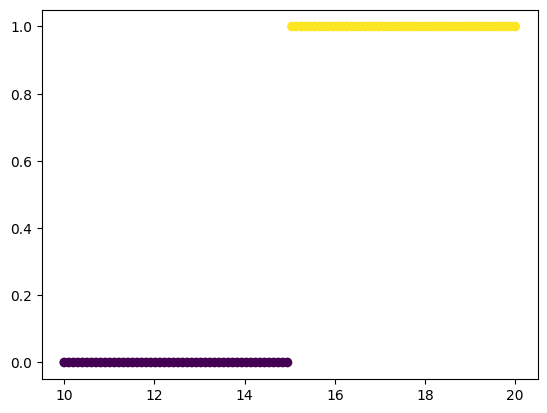

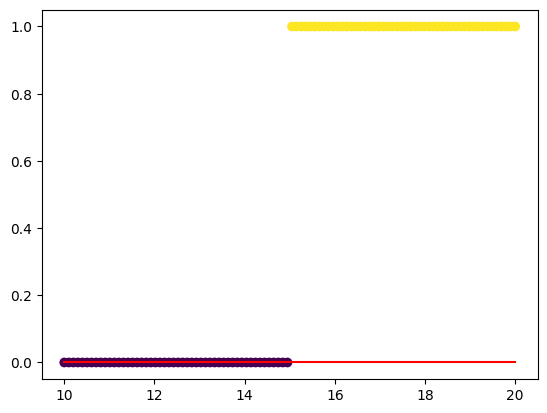

14.73257454436022
0.5


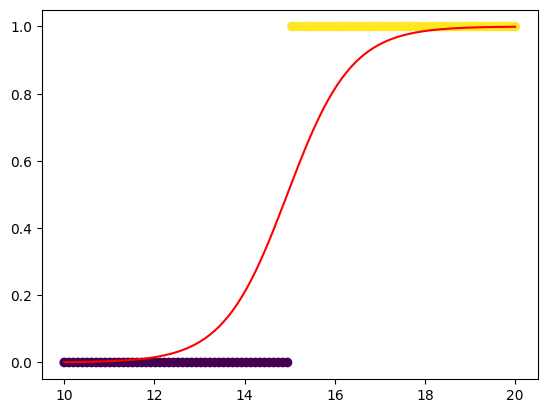

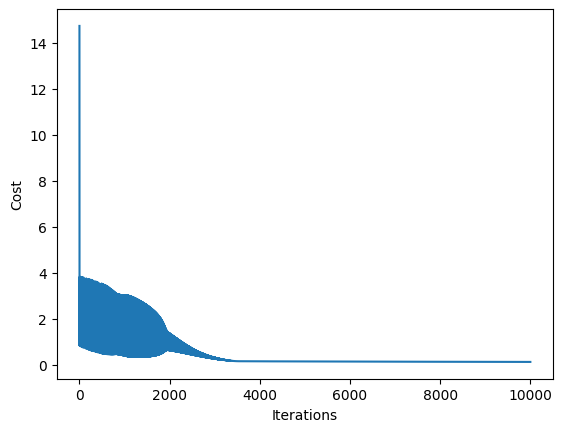

0.99


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

X = np.linspace(10, 20, 100)
Y = np.array([0 if x < 15 else 1 for x in X])

plt.scatter(X, Y, c=Y)
plt.show()

# Sigmoid function
def hypothesis(x, theta):
    return 1 / (1 + np.exp(-(x.dot(theta))))

initial_theta = np.random.randn(2, 1)
X_b = np.c_[np.ones((X.shape[0], 1)), X.reshape(-1, 1)]
Y_b = Y.reshape(-1, 1)

initial_predictions = hypothesis(X_b, initial_theta)
# print(initial_predictions)

# Initial decesion boundary
plt.scatter(X, Y, c=Y)
plt.plot(X, initial_predictions, "r-")
plt.show()

# Cost function
def compute_cost(predictions, Y):
    m = len(Y)
    cost = - (1/m) * (Y.T.dot(np.log(predictions)) + (1 - Y).T.dot(np.log(1 - predictions)))
    return cost[0][0]

initial_cost = compute_cost(initial_predictions, Y_b)
print(initial_cost)

initial_accuracy = accuracy_score(Y_b, (initial_predictions >= 0.5).astype(int))
print(initial_accuracy)

# Gradient descent
def gradient_descent(X, Y, theta, learning_rate=0.1, iterations=1000):
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = hypothesis(X, theta)
        errors = predictions - Y
        gradients = X.T.dot(errors)
        theta -= learning_rate * gradients
        cost_history[i] = compute_cost(predictions, Y)

    return theta, cost_history

final_theta, cost_history = gradient_descent(X_b, Y_b, initial_theta, learning_rate=0.001, iterations=10000)
final_predictions = hypothesis(X_b, final_theta)

# Final decision boundary
plt.scatter(X, Y, c=Y)
plt.plot(X, final_predictions, "r-")
plt.show()

# Cost history
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

final_accuracy = accuracy_score(Y_b, (final_predictions >= 0.5).astype(int))
print(final_accuracy)


In [20]:
final_predictions.min()

np.float64(0.5215314431888182)

1.0
[[50  0]
 [ 0 50]]


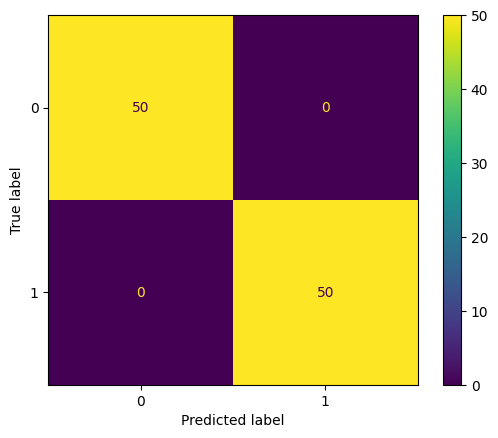

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

model = LogisticRegression()
model.fit(X.reshape(-1, 1), Y)
sklearn_predictions = model.predict(X.reshape(-1, 1))
sklearn_accuracy = accuracy_score(Y, sklearn_predictions)
print(sklearn_accuracy)

sklearn_cm = confusion_matrix(Y, sklearn_predictions)
print(sklearn_cm)

disp = ConfusionMatrixDisplay(confusion_matrix=sklearn_cm)
disp.plot()
plt.show()

sklearn_cr = classification_report(Y, sklearn_predictions)
print(sklearn_cr)



# Iris Datasets

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

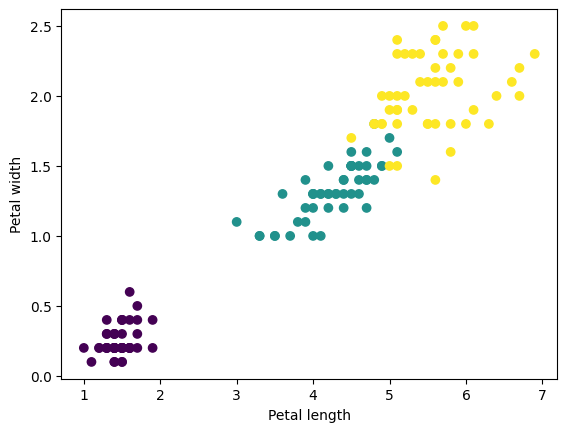

0.9733333333333334


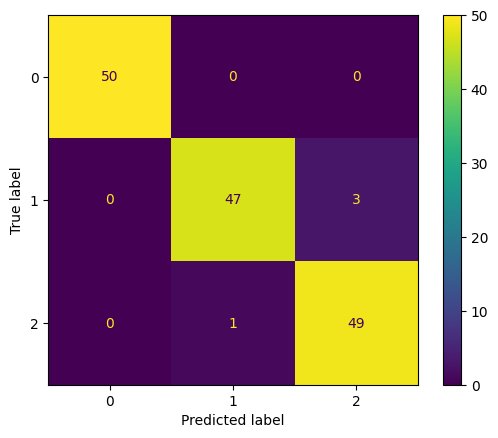

In [35]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
Y_iris = iris.target

print(iris.DESCR)

plt.scatter(X_iris[:, 2], X_iris[:, 3], c=Y_iris)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

model_iris = LogisticRegression(max_iter=200)
model_iris.fit(X_iris, Y_iris)
iris_predictions = model_iris.predict(X_iris)

iris_accuracy = accuracy_score(Y_iris, iris_predictions)
print(iris_accuracy)

iris_cm = confusion_matrix(Y_iris, iris_predictions)
disp_iris = ConfusionMatrixDisplay(confusion_matrix=iris_cm)
disp_iris.plot()
plt.show()